The dataset is about bankruptcy prediction of Polish companies. The data was collected from Emerging Markets Information Service ([EMIS](https://www.emis.com)), which is a database containing information on emerging markets around the world. The bankrupt companies were analyzed in the period 2000-2012, while the still operating companies were evaluated from 2007 to 2013.
datasetLink:"https://archive.ics.uci.edu/ml/datasets/Polish+companies+bankruptcy+data"

In [1]:
#importing libraries 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.impute import SimpleImputer
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


In [2]:
#the data was in arff file formate,so i used scipy library to read it 
from scipy.io import arff
data = arff.loadarff('data (1)/3year.arff')
df = pd.DataFrame(data[0])

In [3]:
df.shape

(10503, 65)

In [4]:
df.columns

Index(['Attr1', 'Attr2', 'Attr3', 'Attr4', 'Attr5', 'Attr6', 'Attr7', 'Attr8',
       'Attr9', 'Attr10', 'Attr11', 'Attr12', 'Attr13', 'Attr14', 'Attr15',
       'Attr16', 'Attr17', 'Attr18', 'Attr19', 'Attr20', 'Attr21', 'Attr22',
       'Attr23', 'Attr24', 'Attr25', 'Attr26', 'Attr27', 'Attr28', 'Attr29',
       'Attr30', 'Attr31', 'Attr32', 'Attr33', 'Attr34', 'Attr35', 'Attr36',
       'Attr37', 'Attr38', 'Attr39', 'Attr40', 'Attr41', 'Attr42', 'Attr43',
       'Attr44', 'Attr45', 'Attr46', 'Attr47', 'Attr48', 'Attr49', 'Attr50',
       'Attr51', 'Attr52', 'Attr53', 'Attr54', 'Attr55', 'Attr56', 'Attr57',
       'Attr58', 'Attr59', 'Attr60', 'Attr61', 'Attr62', 'Attr63', 'Attr64',
       'class'],
      dtype='object')

In [5]:
df=df.rename({"class":"bankrupt"},axis = 1 )


In [6]:
df.columns[-1]

'bankrupt'

In [7]:
df.head(3)

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,bankrupt
0,0.174190,0.41299,0.14371,1.3480,-28.9820,0.60383,0.219460,1.1225,1.1961,0.46359,...,0.163960,0.375740,0.83604,0.000007,9.7145,6.2813,84.291,4.3303,4.0341,b'0'
1,0.146240,0.46038,0.28230,1.6294,2.5952,0.00000,0.171850,1.1721,1.6018,0.53962,...,0.027516,0.271000,0.90108,0.000000,5.9882,4.1103,102.190,3.5716,5.9500,b'0'
2,0.000595,0.22612,0.48839,3.1599,84.8740,0.19114,0.004572,2.9881,1.0077,0.67566,...,0.007639,0.000881,0.99236,0.000000,6.7742,3.7922,64.846,5.6287,4.4581,b'0'


In [8]:
# setting the index name as company_id 
df.index.name = "company_id"
df.head(2)

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,bankrupt
company_id,,,,,,,,,,,,,,,,,,,,,
0,0.17419,0.41299,0.14371,1.3480,-28.9820,0.60383,0.21946,1.1225,1.1961,0.46359,...,0.163960,0.37574,0.83604,0.000007,9.7145,6.2813,84.291,4.3303,4.0341,b'0'
1,0.14624,0.46038,0.28230,1.6294,2.5952,0.00000,0.17185,1.1721,1.6018,0.53962,...,0.027516,0.27100,0.90108,0.000000,5.9882,4.1103,102.190,3.5716,5.9500,b'0'


In [9]:
df["bankrupt"].value_counts()

b'0'    10008
b'1'      495
Name: bankrupt, dtype: int64

<AxesSubplot:title={'center':'data_balance'}, xlabel='class', ylabel='frequency'>

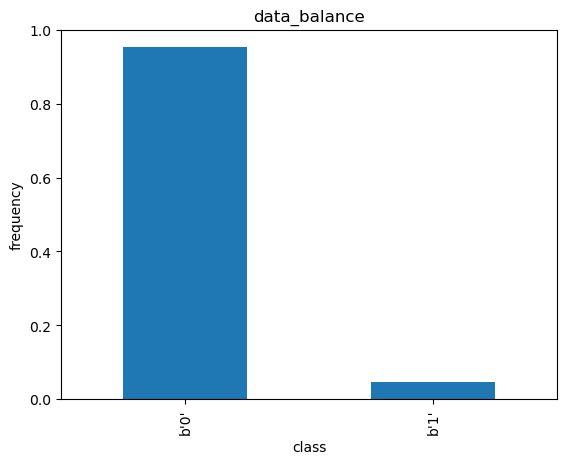

In [10]:
#visualizing the data class imbalance
(df["bankrupt"].value_counts(normalize=True)
 .plot(kind="bar",xlabel="class",ylabel="frequency",title="data_balance"))

In [11]:
# encoding the labels to [0] and [1]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["bankrupt"] = le.fit_transform(df.bankrupt)

In [12]:
df.head(2)
#noticing that (0) means (not_bankrupted) , and (1) means (bankrupted)

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,bankrupt
company_id,,,,,,,,,,,,,,,,,,,,,
0,0.17419,0.41299,0.14371,1.3480,-28.9820,0.60383,0.21946,1.1225,1.1961,0.46359,...,0.163960,0.37574,0.83604,0.000007,9.7145,6.2813,84.291,4.3303,4.0341,0
1,0.14624,0.46038,0.28230,1.6294,2.5952,0.00000,0.17185,1.1721,1.6018,0.53962,...,0.027516,0.27100,0.90108,0.000000,5.9882,4.1103,102.190,3.5716,5.9500,0


## checking corrolated features and deleting it 

In [13]:
#find the corrolated features (corrolation more than .98)
corr_matrix=df.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.99)]
print(to_drop)

['Attr3', 'Attr7', 'Attr10', 'Attr11', 'Attr14', 'Attr17', 'Attr23', 'Attr25', 'Attr26', 'Attr38', 'Attr46', 'Attr49', 'Attr50', 'Attr51', 'Attr52', 'Attr54', 'Attr58', 'Attr62']


In [14]:
# another function to find the corrolation (this is for my reference )
def correlation(dataset, threshold):
    col_corr = list() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.append(colname)
    return col_corr   
col_corr=correlation(df,.99)

In [15]:
col_corr

['Attr7',
 'Attr10',
 'Attr14',
 'Attr14',
 'Attr17',
 'Attr23',
 'Attr25',
 'Attr26',
 'Attr38',
 'Attr46',
 'Attr49',
 'Attr50',
 'Attr51',
 'Attr52',
 'Attr54',
 'Attr62']

In [16]:
df = df.drop(columns=col_corr)
df.shape

(10503, 50)

## checking features normality and removing outliers 

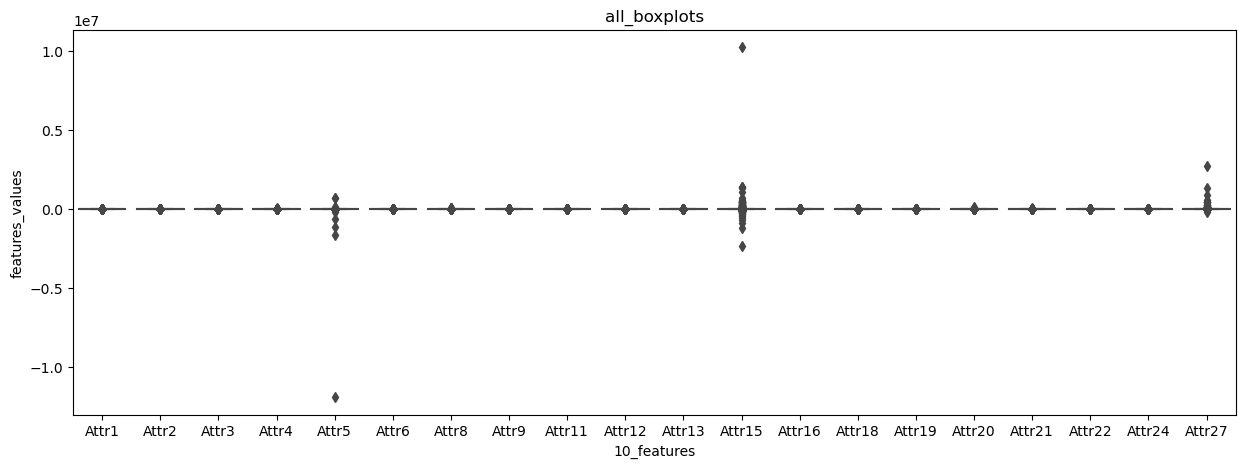

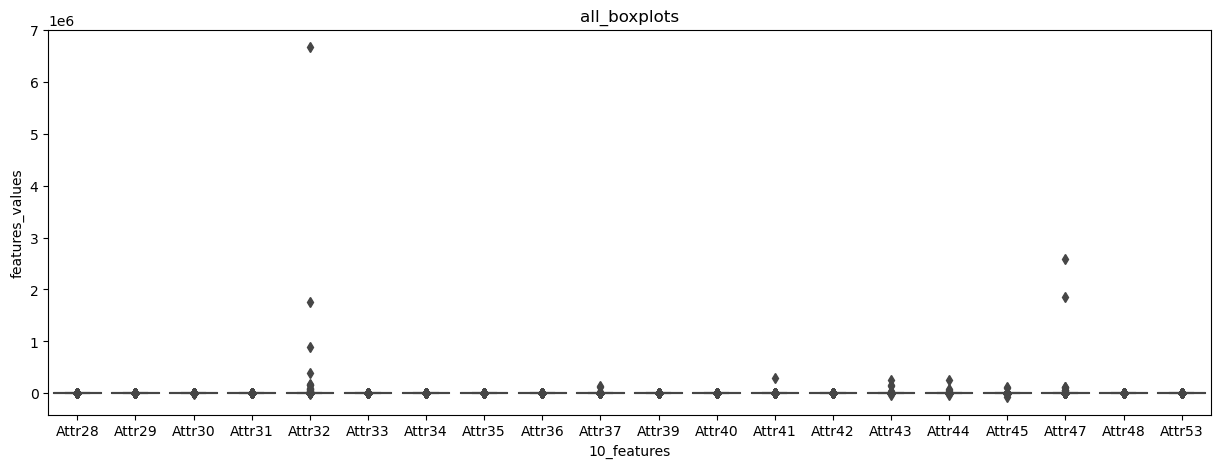

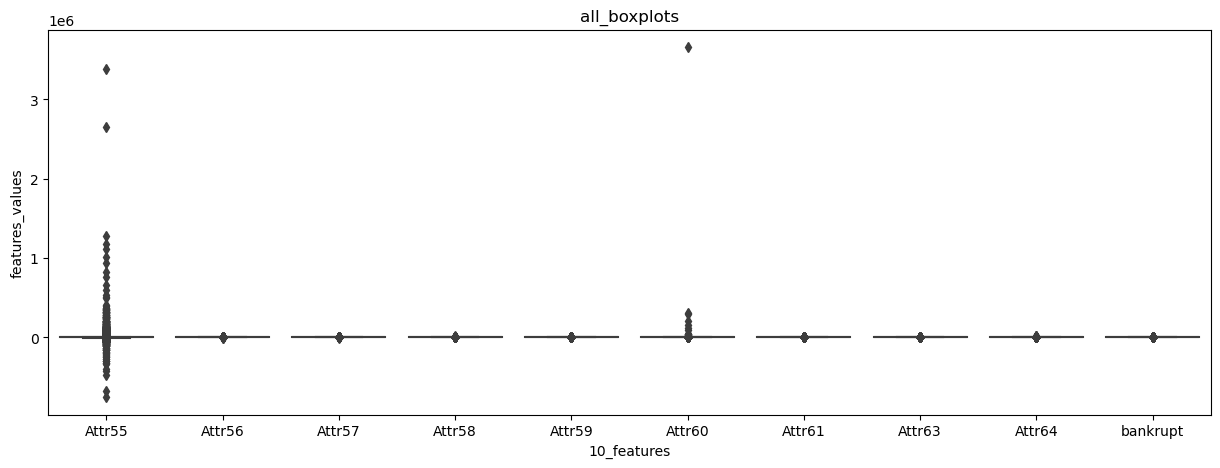

In [17]:
# Create boxplot for all data 
 
j=0    
while j<=len(df.columns):
    features_group=list(df.columns[j:j+20])
    j+=20
    plt.figure(figsize=(15,5))
    sns.boxplot(data=df[features_group])
    plt.xlabel("10_features")
    plt.ylabel("features_values")
    plt.title("all_boxplots")
    plt.show();

boxblots shows that there is many features with many outliers (this observation needs more invistigation )

In [18]:
df_std=df.describe().T["std"].sort_values()

In [19]:
unusual_std=df_std[df_std>1000]
unusual_std

Attr20      1083.699904
Attr45      1720.342176
Attr37      2469.447679
Attr44      2766.505503
Attr41      2845.290346
Attr43      3303.309554
Attr47     31264.160236
Attr27     34691.229230
Attr60     37159.672255
Attr55     59891.957972
Attr32     68412.702913
Attr15    109198.119626
Attr5     118580.569222
Name: std, dtype: float64

In [20]:
# as shown in the previous boxplots , 
# many features has unusual standard variation , which may indicate outliers in the data 
type(unusual_std),unusual_std.index

(pandas.core.series.Series,
 Index(['Attr20', 'Attr45', 'Attr37', 'Attr44', 'Attr41', 'Attr43', 'Attr47',
        'Attr27', 'Attr60', 'Attr55', 'Attr32', 'Attr15', 'Attr5'],
       dtype='object'))

In [21]:
df.shape

(10503, 50)

In [22]:
#checking the corrolation between the features and the target 
pd.DataFrame(df.corr())["bankrupt"].abs().sort_values()

Attr32      0.000363
Attr59      0.000432
Attr64      0.000604
Attr39      0.000626
Attr9       0.001275
Attr13      0.001432
Attr20      0.001622
Attr56      0.001850
Attr42      0.001909
Attr44      0.002022
Attr4       0.002071
Attr63      0.002172
Attr43      0.002225
Attr45      0.002242
Attr41      0.002262
Attr21      0.002301
Attr5       0.002381
Attr40      0.002770
Attr60      0.003075
Attr58      0.003273
Attr34      0.003351
Attr47      0.003356
Attr19      0.003574
Attr37      0.003650
Attr31      0.004028
Attr28      0.004215
Attr53      0.004418
Attr15      0.004495
Attr8       0.004709
Attr16      0.005263
Attr27      0.005265
Attr61      0.005393
Attr30      0.008102
Attr57      0.009320
Attr12      0.011179
Attr55      0.019179
Attr36      0.020230
Attr33      0.022519
Attr18      0.023594
Attr48      0.025347
Attr11      0.026957
Attr1       0.027089
Attr29      0.031104
Attr6       0.033081
Attr24      0.033602
Attr3       0.034292
Attr2       0.035560
Attr22      0

## Split the data 

In [23]:
target = "bankrupt"
X = df.drop(columns=target)
y = df[target]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=42)

## oversampling

In [25]:
#checking again for data balance 
df["bankrupt"].value_counts()


0    10008
1      495
Name: bankrupt, dtype: int64

In [26]:
over_sampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train,y_train)
print(X_train_over.shape)
X_train_over.head()

(16028, 49)


,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr8,Attr9,Attr11,Attr12,...,Attr53,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr63,Attr64
0,0.013739,0.48424,0.335830,3.28400,28.116,0.00000,1.0651,1.36290,0.020933,0.11702,...,0.99734,5550.80,0.014543,0.026638,0.98749,0.000000,5.8807,5.7658,9.2689,2.6354
1,0.055586,0.28747,0.340460,2.21220,41.783,0.15219,2.1786,0.92951,0.065999,0.23498,...,1.65390,5034.80,-0.075836,0.088758,1.07580,0.010533,11.7840,5.4632,5.8354,4.3283
2,0.125190,0.21204,-0.043561,0.76704,-26.932,0.42740,3.7142,1.17620,0.155220,0.83009,...,0.91945,-5127.20,0.149790,0.158960,0.85021,0.031808,68.9750,10.7120,5.7501,1.2553
3,0.271490,0.34761,0.419280,2.24250,300.000,0.12908,1.8768,8.68160,0.316520,0.89850,...,2.68190,1322.00,0.038724,0.416140,0.98078,0.000000,147.9600,149.5800,25.7270,35.6880
4,0.485420,0.38138,0.618620,2.62200,372.120,0.00000,1.6220,2.96690,0.642140,1.56390,...,NaN,490.72,0.200640,0.784690,0.81596,0.000000,NaN,4.2876,7.7793,NaN


In [27]:
# deciding a baseline for the result ( this is based on the distribution 
#of the positive and negatibe labels in the target features)
acc_baseline = y_train_over.value_counts(normalize=True).max()
acc_baseline

0.5

## Decision Tree Model

First model ( Decision Tree , No over_sampling )

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
model_reg = make_pipeline(SimpleImputer(strategy="median"),StandardScaler(),DecisionTreeClassifier(random_state=42))
model_reg.fit(X_train,y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

Second model (Decision Tree , and Over_sampling )

In [30]:
DT_model_over = make_pipeline(SimpleImputer(strategy="median"),DecisionTreeClassifier(random_state=42))
DT_model_over.fit(X_train_over,y_train_over)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [31]:
depth = DT_model_over.named_steps["decisiontreeclassifier"].get_depth()
depth

39

In [32]:
for m in [model_reg, DT_model_over]:
    acc_train = m.score(X_train,y_train)
    acc_test = m.score(X_test,y_test)
    print("Training Accuracy:", round(acc_train, 4))
    print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 1.0
Test Accuracy: 0.9243
Training Accuracy: 1.0
Test Accuracy: 0.9372


#### but accuracy alone is not enough to judge the model , next i will calculate f1_score , recall , precesion

In [33]:
from sklearn.metrics import classification_report

In [34]:
print(classification_report(y_test,DT_model_over.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1994
           1       0.38      0.37      0.38       107

    accuracy                           0.94      2101
   macro avg       0.67      0.67      0.67      2101
weighted avg       0.94      0.94      0.94      2101



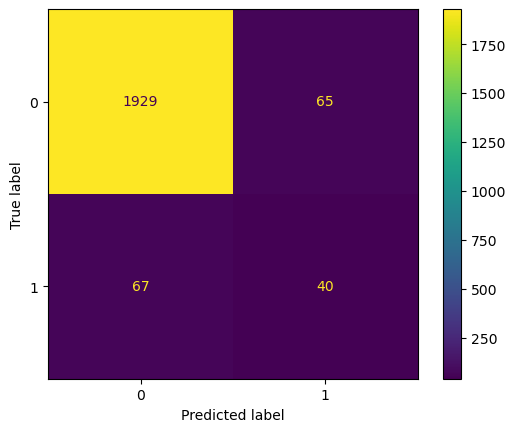

In [35]:
ConfusionMatrixDisplay.from_estimator(DT_model_over,X_test,y_test)

In [36]:
##although the model accuracy is high , but the recall is low , and the f1-score is low 

Visualizing Decision Tree Results


In [37]:
importances = DT_model_over.named_steps["decisiontreeclassifier"].feature_importances_
feat_imp = pd.Series(importances,index=X_train_over.columns).sort_values(ascending=True)[-15:]

In [38]:
feat_imp

Attr40    0.020014
Attr9     0.020386
Attr48    0.020887
Attr13    0.022702
Attr53    0.025229
Attr41    0.025942
Attr39    0.026053
Attr58    0.031640
Attr64    0.038383
Attr21    0.038442
Attr5     0.040851
Attr24    0.061123
Attr27    0.084470
Attr34    0.138254
Attr16    0.144893
dtype: float64

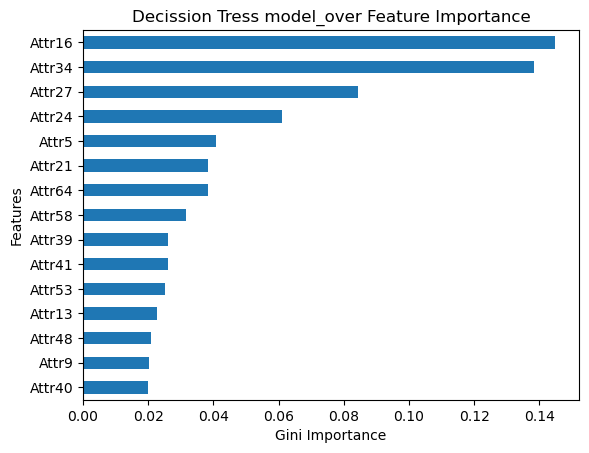

In [39]:
feat_imp.plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Features")
plt.title("Decission Tress model_over Feature Importance");

the most important features in this model is
(attr 34 : operating expenses / total liabilities
attr 8 : book value of equity / total liabilities
attr 33 :operating expenses / short-term liabilities)

In [40]:
import pickle
with open ("model-1.pkl","wb")as f:
    pickle.dump(DT_model_over,f)

In [41]:
with open("model-1.pkl", "rb") as f:
    loaded_model = pickle.load(f)

## Random Forest Model

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
clf = make_pipeline(SimpleImputer(),StandardScaler(),RandomForestClassifier(random_state=42))
print(clf)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])


Doing cross_validation to check the possible results of that model 

In [44]:
cv_acc_scores = cross_val_score(clf,X_train_over,y_train_over,cv=5,n_jobs=-1)
print(cv_acc_scores)

[0.99563319 0.99781659 0.99750468 0.99625585 0.9975039 ]


Deciding the ranges of the hyperparameters 

In [45]:
params = {"simpleimputer__strategy":["mean","median"],
          "randomforestclassifier__n_estimators":range(25,100,25),
          "randomforestclassifier__max_depth":range(10,50,10)}
params

{'simpleimputer__strategy': ['mean', 'median'],
 'randomforestclassifier__n_estimators': range(25, 100, 25),
 'randomforestclassifier__max_depth': range(10, 50, 10)}

In [46]:
RF_model = GridSearchCV(clf,param_grid=params,cv=3,n_jobs=-1,verbose=1)
RF_model

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('standardscaler', StandardScaler()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

In [47]:
RF_model.fit(X_train_over,y_train_over)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('standardscaler', StandardScaler()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

In [48]:
cv_results = pd.DataFrame(RF_model.cv_results_)
cv_results.head(2)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestclassifier__max_depth,param_randomforestclassifier__n_estimators,param_simpleimputer__strategy,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,1.237756,0.020501,0.039336,0.004190,10,25,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.974920,0.971552,0.971921,0.972798,0.001509,21
1,1.270424,0.015839,0.038004,0.007258,10,25,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.973797,0.962942,0.963310,0.966683,0.005033,24


In [49]:
RF_model.best_params_,RF_model.best_score_

({'randomforestclassifier__max_depth': 40,
  'randomforestclassifier__n_estimators': 75,
  'simpleimputer__strategy': 'median'},
 0.9973171871023082)

so the best model depth is 40 and n_estimators = 75 , and the imputer strategy should be the median 

In [50]:
acc_train = RF_model.score(X_train,y_train)
acc_test = RF_model.score(X_test,y_test)
print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 0.9999
Test Accuracy: 0.9562


In [51]:
print(classification_report(y_test,RF_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1994
           1       0.78      0.20      0.31       107

    accuracy                           0.96      2101
   macro avg       0.87      0.60      0.65      2101
weighted avg       0.95      0.96      0.94      2101



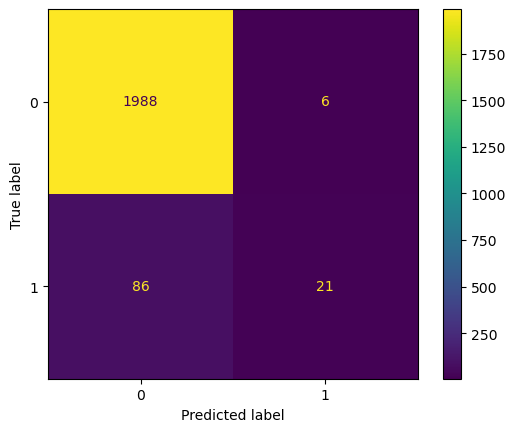

In [52]:
ConfusionMatrixDisplay.from_estimator(RF_model,X_test,y_test)

very bad recall

## Gradient Boosting Classifier Model

In [53]:
from sklearn.ensemble import GradientBoostingClassifier

In [54]:
clf = make_pipeline(SimpleImputer(),StandardScaler(),GradientBoostingClassifier())

In [55]:
params = {"simpleimputer__strategy":["mean","median"],"gradientboostingclassifier__max_depth":range(2,5),"gradientboostingclassifier__n_estimators":range(20,31,5)}
params

{'simpleimputer__strategy': ['mean', 'median'],
 'gradientboostingclassifier__max_depth': range(2, 5),
 'gradientboostingclassifier__n_estimators': range(20, 31, 5)}

In [56]:
GBC_model = GridSearchCV(clf,param_grid=params,cv=5,n_jobs=-1,verbose=1)

In [57]:
GBC_model.fit(X_train_over,y_train_over)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('standardscaler', StandardScaler()),
                                       ('gradientboostingclassifier',
                                        GradientBoostingClassifier())]),
             n_jobs=-1,
             param_grid={'gradientboostingclassifier__max_depth': range(2, 5),
                         'gradientboostingclassifier__n_estimators': range(20, 31, 5),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

In [58]:
results = pd.DataFrame(GBC_model.cv_results_)
results.sort_values("rank_test_score").head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gradientboostingclassifier__max_depth,param_gradientboostingclassifier__n_estimators,param_simpleimputer__strategy,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
16,8.652441,0.522854,0.011200,1.939620e-03,4,30,mean,"{'gradientboostingclassifier__max_depth': 4, '...",0.898939,0.902994,0.898939,0.898284,0.896724,0.899176,0.002074,1
17,7.989998,0.146574,0.010601,1.624643e-03,4,30,median,"{'gradientboostingclassifier__max_depth': 4, '...",0.890206,0.900811,0.885527,0.883931,0.899844,0.892064,0.007062,2
14,6.545883,0.660017,0.010201,1.166057e-03,4,25,mean,"{'gradientboostingclassifier__max_depth': 4, '...",0.889894,0.891142,0.890830,0.880499,0.891732,0.888819,0.004202,3
15,6.169655,0.165965,0.009000,4.623108e-07,4,25,median,"{'gradientboostingclassifier__max_depth': 4, '...",0.879913,0.889894,0.873051,0.873947,0.887051,0.880771,0.006776,4
12,5.642416,0.170509,0.009400,1.199746e-03,4,20,mean,"{'gradientboostingclassifier__max_depth': 4, '...",0.872427,0.882408,0.879913,0.873947,0.881435,0.878026,0.004059,5


In [59]:
GBC_model.best_params_

{'gradientboostingclassifier__max_depth': 4,
 'gradientboostingclassifier__n_estimators': 30,
 'simpleimputer__strategy': 'mean'}

In [60]:
print(classification_report(y_test,GBC_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.87      0.93      1994
           1       0.25      0.79      0.38       107

    accuracy                           0.87      2101
   macro avg       0.62      0.83      0.65      2101
weighted avg       0.95      0.87      0.90      2101



improving the model recall , very good!

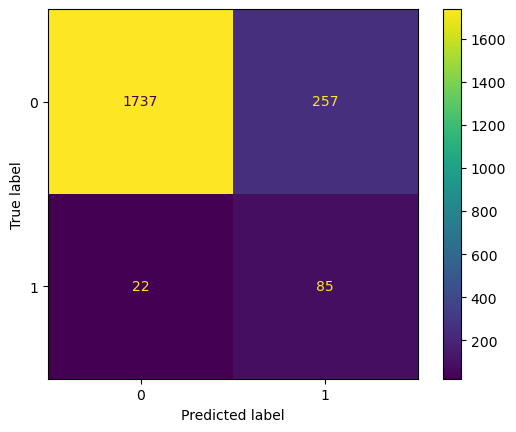

In [61]:
ConfusionMatrixDisplay.from_estimator(GBC_model,X_test,y_test)

better performance on the positive labels , but the precesion is low 

## Logistic Regression Model

In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
clf = make_pipeline(SimpleImputer(),StandardScaler(),LogisticRegression(random_state=42,max_iter=500))
print(clf)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(max_iter=500, random_state=42))])


In [64]:
LogisticRegression

sklearn.linear_model._logistic.LogisticRegression

In [65]:
pd.DataFrame(clf.get_params())

,memory,steps,verbose,simpleimputer,standardscaler,logisticregression,simpleimputer__add_indicator,simpleimputer__copy,simpleimputer__fill_value,simpleimputer__missing_values,...,logisticregression__l1_ratio,logisticregression__max_iter,logisticregression__multi_class,logisticregression__n_jobs,logisticregression__penalty,logisticregression__random_state,logisticregression__solver,logisticregression__tol,logisticregression__verbose,logisticregression__warm_start
0,None,"(simpleimputer, SimpleImputer())",False,SimpleImputer(),StandardScaler(),"LogisticRegression(max_iter=500, random_state=42)",False,True,None,NaN,...,None,500,auto,None,l2,42,lbfgs,0.0001,0,False
1,None,"(standardscaler, StandardScaler())",False,SimpleImputer(),StandardScaler(),"LogisticRegression(max_iter=500, random_state=42)",False,True,None,NaN,...,None,500,auto,None,l2,42,lbfgs,0.0001,0,False
2,None,"(logisticregression, LogisticRegression(max_it...",False,SimpleImputer(),StandardScaler(),"LogisticRegression(max_iter=500, random_state=42)",False,True,None,NaN,...,None,500,auto,None,l2,42,lbfgs,0.0001,0,False


In [66]:
clf.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'simpleimputer', 'standardscaler', 'logisticregression', 'simpleimputer__add_indicator', 'simpleimputer__copy', 'simpleimputer__fill_value', 'simpleimputer__missing_values', 'simpleimputer__strategy', 'simpleimputer__verbose', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'logisticregression__C', 'logisticregression__class_weight', 'logisticregression__dual', 'logisticregression__fit_intercept', 'logisticregression__intercept_scaling', 'logisticregression__l1_ratio', 'logisticregression__max_iter', 'logisticregression__multi_class', 'logisticregression__n_jobs', 'logisticregression__penalty', 'logisticregression__random_state', 'logisticregression__solver', 'logisticregression__tol', 'logisticregression__verbose', 'logisticregression__warm_start'])

In [67]:
params = {"simpleimputer__strategy":["mean","median"],
          "logisticregression__penalty":['l1', 'l2'],
          "logisticregression__multi_class":['ovr', 'multinomial'],
          'logisticregression__C':[.1,.3,.6,.9],
          'logisticregression__solver':[ 'lbfgs',  'saga']}
params

{'simpleimputer__strategy': ['mean', 'median'],
 'logisticregression__penalty': ['l1', 'l2'],
 'logisticregression__multi_class': ['ovr', 'multinomial'],
 'logisticregression__C': [0.1, 0.3, 0.6, 0.9],
 'logisticregression__solver': ['lbfgs', 'saga']}

In [68]:
LR_model = GridSearchCV(clf,param_grid=params,cv=5,n_jobs=-1,verbose=1)

In [69]:
LR_model.fit(X_train_over,y_train_over)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
80 fits failed out of a total of 320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, sel

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=500,
                                                           random_state=42))]),
             n_jobs=-1,
             param_grid={'logisticregression__C': [0.1, 0.3, 0.6, 0.9],
                         'logisticregression__multi_class': ['ovr',
                                                             'multinomial'],
                         'logisticregression__penalty': ['l1', 'l2'],
                         'logisticregression__solver': ['lbfgs', 'saga'],
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

In [70]:
LR_model.best_params_

{'logisticregression__C': 0.9,
 'logisticregression__multi_class': 'multinomial',
 'logisticregression__penalty': 'l2',
 'logisticregression__solver': 'lbfgs',
 'simpleimputer__strategy': 'median'}

In [71]:
print(classification_report(y_test,LR_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.64      0.77      1994
           1       0.10      0.76      0.18       107

    accuracy                           0.64      2101
   macro avg       0.54      0.70      0.47      2101
weighted avg       0.94      0.64      0.74      2101



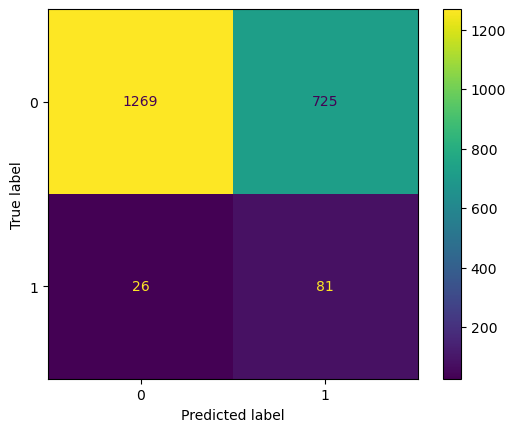

In [72]:
ConfusionMatrixDisplay.from_estimator(LR_model,X_test,y_test)

The model has a very good recall but a bad precession 

## A Function to control the threshhold probabilitly of deciding the label prediction

In [73]:
import ipywidgets as widgets
from ipywidgets import interact

In [74]:
def make_cnf_matrix(threshold):
    y_pred_proba=LR_model.predict_proba(X_test)[:,-1]
    y_pred=y_pred_proba>threshold
    conf_matrix=confusion_matrix(y_test,y_pred)
    tn,fp,fn,tp=conf_matrix.ravel()
    print(f"false positive {fp}")
    print(f"false negative {fn}")
    ConfusionMatrixDisplay.from_predictions(y_test,y_pred,colorbar=False)
    
   


thresh_widget = widgets.FloatSlider(min=0,max=1,value=.5,step=.05)

interact(make_cnf_matrix, threshold=thresh_widget);

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.05), Output()), _dom_cla…

# Test logisticregression model, and gradient boosting model on new dataset 

In [75]:
test_data = arff.loadarff('data (1)/2year.arff')
test_df = pd.DataFrame(test_data[0])

In [76]:
test_df.shape

(10173, 65)

In [77]:
test_df=test_df.rename({"class":"bankrupt"},axis = 1 )

In [78]:
test_df["bankrupt"] = le.fit_transform(test_df.bankrupt)

In [79]:
test_df = test_df.drop(columns=col_corr)
test_df.shape

(10173, 50)

In [80]:
target = "bankrupt"
final_x_test = test_df.drop(columns=target)
final_y_test = test_df[target]

###  Testing Logistic regresion 

In [81]:
def make_cnf_matrix(threshold):
    y_pred_proba=LR_model.predict_proba(final_x_test)[:,-1]
    y_pred=y_pred_proba>threshold
    conf_matrix=confusion_matrix(final_y_test,y_pred)
    tn,fp,fn,tp=conf_matrix.ravel()
    print(f"false positive {fp}")
    print(f"false negative {fn}")
    ConfusionMatrixDisplay.from_predictions(final_y_test,y_pred,colorbar=False)
    print(classification_report(final_y_test,y_pred))
    
   


thresh_widget = widgets.FloatSlider(min=0,max=1,value=.5,step=.05)

interact(make_cnf_matrix, threshold=thresh_widget);


interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.05), Output()), _dom_cla…

In [82]:
def make_cnf_matrix(threshold):
    y_pred_proba=GBC_model.predict_proba(final_x_test)[:,-1]
    y_pred=y_pred_proba>threshold
    conf_matrix=confusion_matrix(final_y_test,y_pred)
    tn,fp,fn,tp=conf_matrix.ravel()
    print(f"false positive {fp}")
    print(f"false negative {fn}")
    ConfusionMatrixDisplay.from_predictions(final_y_test,y_pred,colorbar=False)
    print(classification_report(final_y_test,y_pred))
    
   


thresh_widget = widgets.FloatSlider(min=0,max=1,value=.5,step=.05)

interact(make_cnf_matrix, threshold=thresh_widget);

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.05), Output()), _dom_cla…